# Introduction
Hello! This a text analysis of the lyrics of some of my favorite rappers. I have always appreciated witty lines and superior storytelling in my music over sick beats. Let's see what the data can tell us about the verse I love so much.

# Data Description

I built a web scrapper to extract lyrics from the following artists and albums from https://genius.com/. This scraper is designed to extract lyrics from all pieces in a listed album (including interludes and skits). Here are the albums and artists I looked at

|  Eminem | The Weeknd | Chance The Rapper | 
|---|---|---|
|Revival (2017) | Starboy (2016) | Coloring Book (2016)| 
|The Marshall Mathers LP2 (2013)| Beauty Behind the Madness (2015) | Acid Rap (2013)|
| Recovery(2010) | Kiss Land (2013)| 10 Day (2012) | 
| Relapse (2009) | Trilogy (2012) |
| Curtain Call (2005) |
| Encore (2004) |
| The Eminem Show (2002) |
| The Marshall Mathers LP (2000) |


| Kendrick Lamar| Childish Gambino | Frank Ocean | 
|---|---|---|
|DAMN. (2017)|Awaken, My Love! (2016)| Blonde (2016) |
|untitled unmastered  (2016)| Kauai (2014)| Endless (2016) |
| To Pimp a Butterfly (2015) | Because the Internet (2013) | Unreleased misc (2013) | 
| Compton State of Mind (2014)| Camp (2011) | Channel Orange (2012) | 
| Good kid M.A.A.D city (2012) |
| Section 80 (2011) | 
| Overly Dedicated (2010)| 


| Drake | Kanye West |
|---|---|
|More Life (2017) |The Life of Pablo (2016) |
| Views (2016) |Yeezus (2013)|
|If You're Reading This It's Too Late (2015)  | My Beautiful Dark Twisted Fantasy (2010) |
| Nothing Was the Same (2013) | 808s Heartbreak (2008) |
| Take Care (2011) | Graduation (2007) |
| Thank Me Later (2010) | Late Registration (2005) |
|  | The College Dropout (2004) |



For the full scraper check out [this file](https://github.com/aprasla0922/Portfolio/blob/master/Music%20Lyrics/Data/extract.py) in the repository.

Whew! So we now have a wealth of information. Let's see what the data looks like

In [5]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Data/cleaned_data.csv",index_col = 0)
#simple data cleaning for each line
df.Lyrics = df.Lyrics.map(lambda lyric: lyric.replace("\r\r\n"," "))
df.head()

,AlbumLink,AlbumName,Artist,Lyrics,SongLink,SongName,Year
0,https://genius.com/albums/Eminem/revival,Revival,Eminem,I walk on water But I ain't no Jesus I walk on...,https://genius.com/Eminem-walk-on-water-lyrics,Walk On Water (Ft. Beyoncé),2017
1,https://genius.com/albums/Eminem/revival,Revival,Eminem,And I started from the bottom Like a snowman—g...,https://genius.com/Eminem-believe-lyrics,Believe,2017
2,https://genius.com/albums/Eminem/revival,Revival,Eminem,Instinctive nature to bring the anguish (yeah)...,https://genius.com/Eminem-chloraseptic-lyrics,Chloraseptic (Ft. PHresher),2017
3,https://genius.com/albums/Eminem/revival,Revival,Eminem,"Hands up, officer don’t shoot Then pull your p...",https://genius.com/Eminem-untouchable-lyrics,Untouchable,2017
4,https://genius.com/albums/Eminem/revival,Revival,Eminem,"I've been a liar, been a thief Been a lover, b...",https://genius.com/Eminem-river-lyrics,River (Ft. Ed Sheeran),2017


# Exactly how nice is Chance?
My roommate and I were talking the other day about some conspiracy theories floating around the internet about Chance (the Rapper in case you were confused). These bloggers weren't really buying Chance's "nice guy act" and presenting evidence that Chance was a music industry plant. Here is the article we were talking about http://deadendhiphop.com/sorry-chance-im-buying/. 

While I believe this author is full of crap, I can't anwser the industry plant question with lyric data. However, I can see how his "niceness" stack up with his fellow artists. A basic sentiment analysis would reveal how positive he generally is.


A Quick TLDR on sentiment analysis: it measures how "positive" and how "negative" a particular sentence is. A good sentiment analyzer would assign a higher positive value for "OMG you are the greatest person ever" 

In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as senti 
from nltk.tokenize import sent_tokenize
analyzer = senti()
scores = df.Lyrics.map(lambda x: [analyzer.polarity_scores(y) for y in sent_tokenize(str(x))])
df['AvgPositive'] = scores.map(lambda x: sum([item['pos'] - item['neg'] for item in x])/len(x))
#it is better to normalize the column because we are using sentiment as a comparison metric
df['NormPositive'] = df.AvgPositive.map(lambda x: (x - df.AvgPositive.mean())/df.AvgPositive.std())

<Container object of 8 artists>

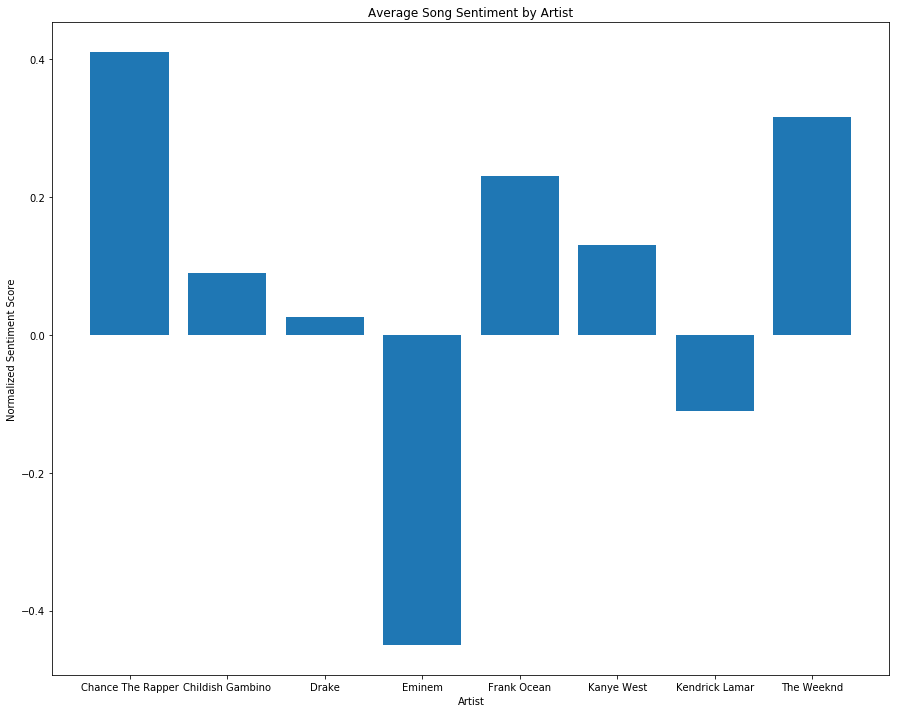

In [17]:
mean_senti = df.groupby('Artist')['NormPositive'].mean()
plt.figure(figsize = (15,12))
plt.title('Average Song Sentiment by Artist')
plt.ylabel('Normalized Sentiment Score')
plt.xlabel('Artist')
plt.bar(mean_senti.index,mean_senti)

The average Chance song is about .4 standard deviations above the average song, a pretty significant positive sentiment. Averages can be misleading though. How do Chance's albums stack up over time?

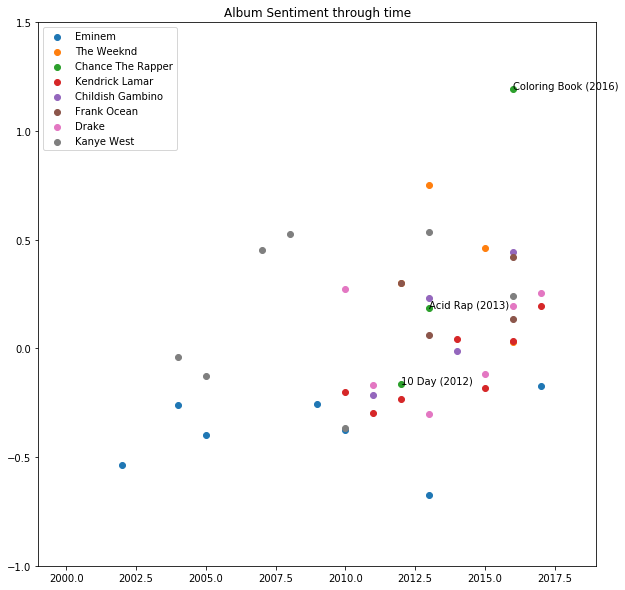

In [23]:
album_artist = df.groupby(['AlbumName','Artist','Year'])['NormPositive'].mean()
album_artist = album_artist.reset_index()
album_artist.columns = ['AlbumName','Artist','Year','AverageNormPositive']
fig = plt.figure(figsize =(10,10) )
ax = fig.add_subplot(111)
plot_artist = ['Kanye West','Childish Gambino']
for artist in df.Artist.unique():
    current = album_artist[album_artist.Artist == artist]
    plt.scatter(current.Year,current.AverageNormPositive)
    if (artist == "Chance The Rapper"):        
        for Title, Year, Senti in zip(list(current.AlbumName.values),list(current.Year.values),list(current.AverageNormPositive.values)):
             ax.annotate(Title + " ("+str(Year)+")",xy = (Year,Senti),textcoords='data')
    plt.legend(df.Artist.unique())
    plt.ylim(-1,1.5)
    plt.title('Album Sentiment through time')
    plt.xlim(1999,2019)
plt.show()

In [6]:
import numpy as np
def is_int(item):
    try:
        i = int(item)
        return True
    except:
        return False

In [7]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.snowball import EnglishStemmer
l = WordNetLemmatizer()
s = EnglishStemmer()
stop_words = set(stopwords.words('english'))
useless = ["n't",",","'","(",")","'s","'ll","[","]","?"]
words = df.Lyrics.map(lambda x:' '.join(list(filter(lambda y: y not in stop_words and y not in useless and not is_int(y),[s.stem(l.lemmatize(y)) for y in word_tokenize(x)]))))


In [223]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
df.index = range(0,len(df))
vec = TfidfVectorizer(analyzer = 'word',stop_words = 'english',lowercase = True)
dtm = vec.fit_transform(words)
feature_names = vec.get_feature_names()
text_data = StandardScaler().fit_transform(dtm.toarray())
#compress text_data into albums
text_df = pd.DataFrame(text_data)
text_df['Artist'] = df.Artist
text_df['AlbumName'] = df.AlbumName
text_df = text_df.groupby(['Artist','AlbumName']).mean()
text_df.reset_index(inplace = True)
text_data_index = text_df[['Artist','AlbumName']]
text_data = text_df.drop(['Artist','AlbumName'],axis = 1).as_matrix()
text_df = None
dtm = None

In [233]:
def add_index_to_results(index,compressed):
    mod_df = index
    mod_df['Comp1'] = compressed[:,0]
    mod_df['Comp2'] = compressed[:,1]
    return mod_df

In [234]:
#Sparse PCA dimensionality reduction into two dimensions
sPca = SparsePCA(n_components = 2,alpha = 1)
sparce_pca = sPca.fit_transform(text_data)
sparce_pca = add_index_to_results(text_data_index,sparce_pca)

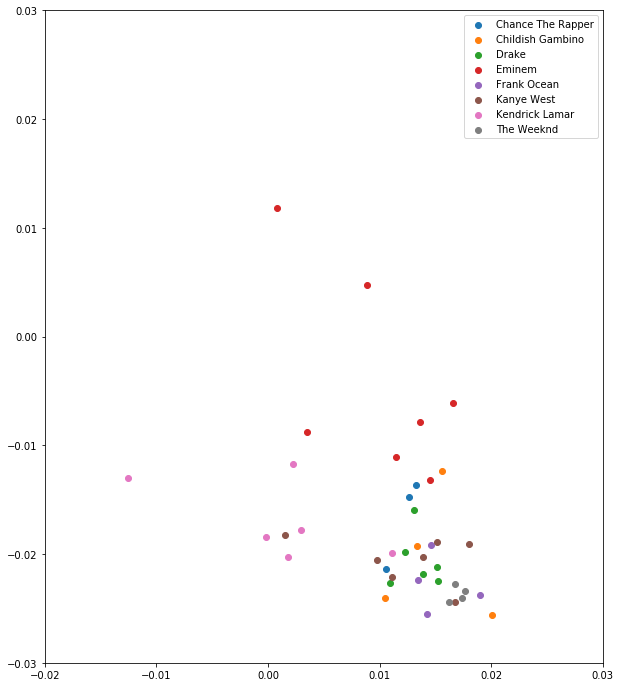

In [253]:
#aggregate by artist
def plot_albums(transformed_with_index,xlim = (-.02,.03),ylim = (-.03,.03)):
    plt.figure(figsize = (10,12))
    for artist in transformed_with_index.Artist.unique():
        plt.scatter(transformed_with_index[transformed_with_index.Artist == artist].Comp1,transformed_with_index[transformed_with_index.Artist == artist].Comp2)
        plt.legend(transformed_with_index.Artist.unique())
        plt.xlim(xlim)
        plt.ylim(ylim)
plot_albums(sparce_pca)

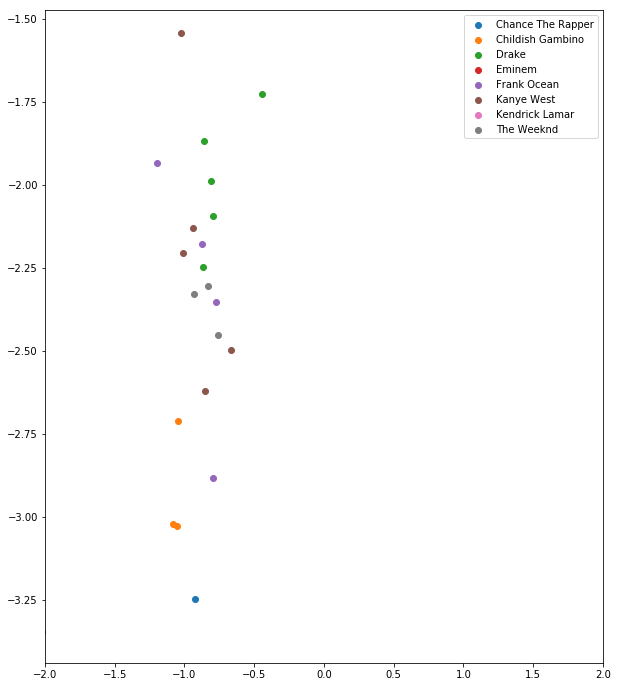

In [258]:
plot_albums(add_index_to_results(text_data_index,simple_pca_data),xlim = (-2,2),ylim = None)

In [255]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(text_data)
var = pca.explained_variance_ratio_
simple_pca_data = pca.transform(text_data)

In [190]:
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate = 100,n_components = 2,early_exaggeration = 2,n_iter_without_progress = 500)
tSne_data = tsne.fit_transform(text_data)

(-0.01, 0.02)

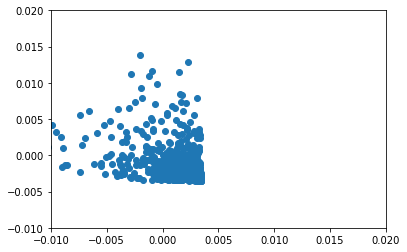

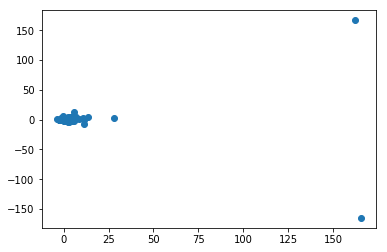

In [101]:
plt.scatter(simple_pca_data[:,0],simple_pca_data[:,1])

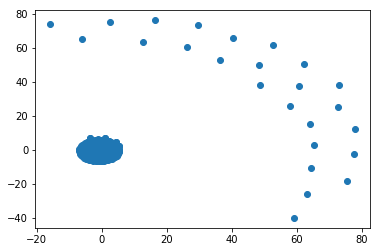

In [112]:
plt.scatter(tSne_data[:,0],tSne_data[:,1])

[[  1.00000000e+00   8.90019936e-04   3.05884525e-02]
 [  8.90019936e-04   1.00000000e+00  -2.02803449e-02]
 [  3.05884525e-02  -2.02803449e-02   1.00000000e+00]]


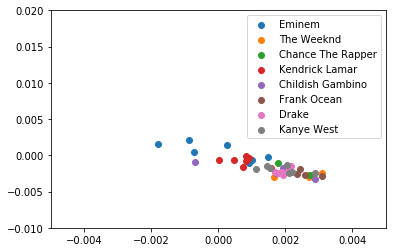

In [212]:
def return_df_2d_text_space(orig_df,compressed_matrix):
    mod_df = orig_df
    mod_df['Comp1'] = pd.Series(compressed_matrix[:,0])
    mod_df['Comp2'] = pd.Series(compressed_matrix[:,1])
    return mod_df


with_low_dim = return_df_2d_text_space(df,sparce_pca)
with_low_dim_avg = with_low_dim.groupby(['Artist','AlbumName'])[['Comp1','Comp2']].mean()
with_low_dim_avg = with_low_dim_avg.reset_index()
for artist in with_low_dim.Artist.unique():
    plt.scatter(with_low_dim_avg[with_low_dim_avg.Artist == artist].Comp1,with_low_dim_avg[with_low_dim_avg.Artist == artist].Comp2)
    plt.legend(with_low_dim.Artist.unique())
    plt.xlim(-.005,.005)
    plt.ylim(-.01,.02)

In [207]:
help(df.unstack)

Help on method unstack in module pandas.core.frame:

unstack(level=-1, fill_value=None) method of pandas.core.frame.DataFrame instance
    Pivot a level of the (necessarily hierarchical) index labels, returning
    a DataFrame having a new level of column labels whose inner-most level
    consists of the pivoted index labels. If the index is not a MultiIndex,
    the output will be a Series (the analogue of stack when the columns are
    not a MultiIndex).
    The level involved will automatically get sorted.
    
    Parameters
    ----------
    level : int, string, or list of these, default -1 (last level)
        Level(s) of index to unstack, can pass level name
    fill_value : replace NaN with this value if the unstack produces
        missing values
    
        .. versionadded: 0.18.0
    
    See also
    --------
    DataFrame.pivot : Pivot a table based on column values.
    DataFrame.stack : Pivot a level of the column labels (inverse operation
        from `unstack`).
    

array([[ 1.        ,  0.33866182, -0.04817809],
       [ 0.33866182,  1.        , -0.01379755],
       [-0.04817809, -0.01379755,  1.        ]])

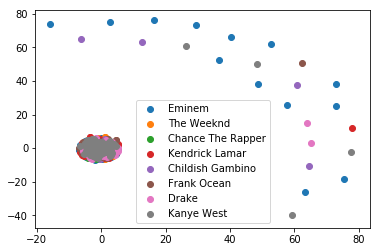

(715, 11)